In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
log =  pd.read_csv('log_mini.csv', low_memory=False)
track_f =  pd.read_csv('tf_mini.csv', low_memory=False)

In [3]:
log.head(3)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
#log.isnull().any()

In [5]:
log['skip_1'].value_counts()

False    97118
True     70762
Name: skip_1, dtype: int64

In [6]:
log['skip_2'].value_counts()

True     86824
False    81056
Name: skip_2, dtype: int64

In [7]:
log['skip_3'].value_counts()

True     108850
False     59030
Name: skip_3, dtype: int64

Frequence of 3 skip times almost same, with skip at the end of the track the most.

In [8]:
log['context_switch'].value_counts()

0    161013
1      6867
Name: context_switch, dtype: int64

Most users do not switch playlist during one session

In [9]:
log['premium'].value_counts()

True     136053
False     31827
Name: premium, dtype: int64

Suppose to annalyze normal and premium user seperately

In [10]:
log['session_length'].value_counts()

20    101320
11      8272
10      8190
12      7752
13      7111
15      6525
14      6426
19      5966
18      5454
17      5440
16      5424
Name: session_length, dtype: int64

In [11]:
# log_track= pd.merge(left=log,right=track_f,how='left',on = 'track_id')                # merge log & track 

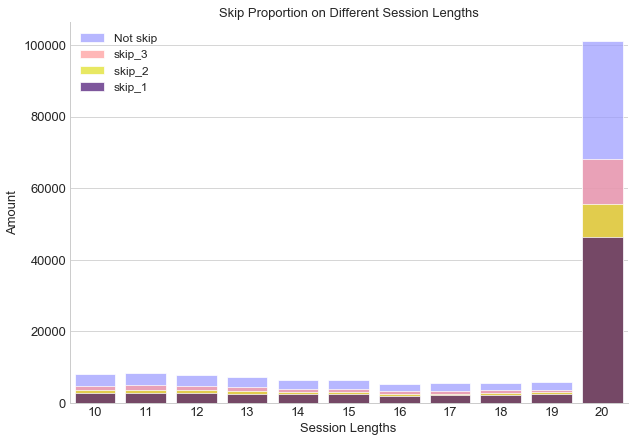

In [12]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 7)) 
session_length =  log['session_length'].value_counts().sort_index() 
y1 = session_length    # all 
y2 = log.groupby(by=['session_length'])['skip_3'].sum().values
y3 = log.groupby(by=['session_length'])['skip_2'].sum().values
y4 = log.groupby(by=['session_length'])['skip_1'].sum().values

sns.barplot(session_length.index, y1,  alpha=0.7, label = 'Not skip' ,facecolor='#9999ff', edgecolor='white')
sns.barplot(session_length.index, y2, alpha=0.7, label = 'skip_3', facecolor='#ff9999', edgecolor='white' )
sns.barplot(session_length.index, y3,  alpha=0.7, label = 'skip_2 ',color = 'yellow',edgecolor='white')
sns.barplot(session_length.index, y4,  alpha=0.7,label = 'skip_1',color = 'indigo', edgecolor='white')

plt.title('Skip Proportion on Different Session Lengths',fontsize=13)
plt.xlabel('Session Lengths',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 12)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# plt.savefig(os.path.join('figures', 'rating distributions.png'), format='png', dpi=300)

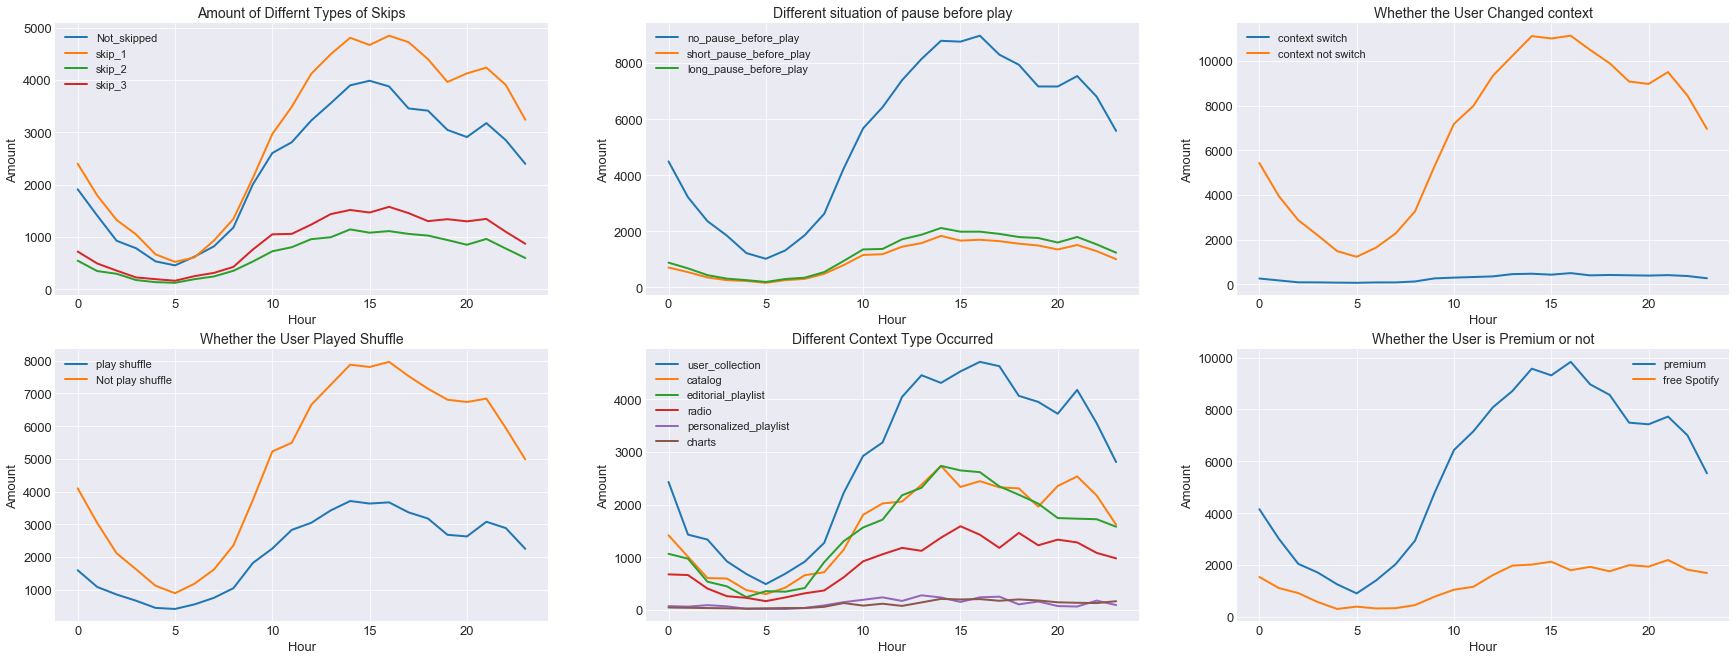

In [13]:
sns.set_style("darkgrid")
#  sns.set_style("white")
fig, ax = plt.subplots(figsize=(30, 11)) 

plt.subplot(2, 3, 1)
hour_of_day = log['hour_of_day'].value_counts().sort_index() # all 
y1 = log.groupby(by=['hour_of_day'])['not_skipped'].sum().values
y2 = log.groupby(by=['hour_of_day'])['skip_1'].sum().values
y3 =  log.groupby(by=['hour_of_day'])['skip_2'].sum().values - log.groupby(by=['hour_of_day'])['skip_1'].sum().values
y4 = log.groupby(by=['hour_of_day'])['skip_3'].sum().values - log.groupby(by=['hour_of_day'])['skip_2'].sum().values 


plt.plot(hour_of_day.index, y1, label = 'Not_skipped',lw=2)
plt.plot(hour_of_day.index, y2, label = 'skip_1',lw=2)
plt.plot(hour_of_day.index, y3, label = 'skip_2',lw=2)
plt.plot(hour_of_day.index, y4, label = 'skip_3',lw=2)

plt.title('Amount of Differnt Types of Skips',fontsize=14)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 11)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

##############################################################################

plt.subplot(2, 3, 2)
y5 = log.groupby(by=['hour_of_day'])['no_pause_before_play'].sum().values
y6 = log.groupby(by=['hour_of_day'])['short_pause_before_play'].sum().values
y7 = log.groupby(by=['hour_of_day'])['long_pause_before_play'].sum().values

plt.plot(hour_of_day.index, y5, label = 'no_pause_before_play',lw=2)
plt.plot(hour_of_day.index, y6, label = 'short_pause_before_play',lw=2)
plt.plot(hour_of_day.index, y7, label = 'long_pause_before_play',lw=2)

plt.title('Different situation of pause before play',fontsize=14)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 11)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

##############################################################################

plt.subplot(2, 3, 3)
y8 = log.groupby(by=['hour_of_day'])['context_switch'].sum().values  # context switch 
y9 = log['hour_of_day'].value_counts().sort_index().values -  log.groupby(by=['hour_of_day'])['context_switch'].sum().values

plt.plot(hour_of_day.index, y8, label = 'context switch',lw=2)
plt.plot(hour_of_day.index, y9, label = 'context not switch',lw=2)

plt.title('Whether the User Changed context',fontsize=14)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 11)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

##############################################################################


plt.subplot(2, 3, 4)
y10 = log.groupby(by=['hour_of_day'])['hist_user_behavior_is_shuffle'].sum().values
y11 = log['hour_of_day'].value_counts().sort_index().values -  log.groupby(by=['hour_of_day'])['hist_user_behavior_is_shuffle'].sum().values

plt.plot(hour_of_day.index, y10, label = 'play shuffle',lw=2)
plt.plot(hour_of_day.index, y11, label = 'Not play shuffle',lw=2)

plt.title('Whether the User Played Shuffle',fontsize=14)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 11)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)


##############################################################################


plt.subplot(2, 3, 5)
user_collection = log.loc[log['context_type'] == 'user_collection' ]
catalog = log.loc[log['context_type'] == 'catalog' ]
editorial_playlist = log.loc[log['context_type'] == 'editorial_playlist' ]
radio = log.loc[log['context_type'] == 'radio' ]
personalized_playlist =  log.loc[log['context_type'] == 'personalized_playlist' ]
charts = log.loc[log['context_type'] == 'charts' ]

u = user_collection['hour_of_day'].value_counts().sort_index()
c = catalog['hour_of_day'].value_counts().sort_index()
e = editorial_playlist['hour_of_day'].value_counts().sort_index()
r = radio['hour_of_day'].value_counts().sort_index()
p = personalized_playlist['hour_of_day'].value_counts().sort_index()
ch =  charts['hour_of_day'].value_counts().sort_index()

plt.plot(u.index, u, label = 'user_collection',lw=2)
plt.plot(c.index, c, label = 'catalog',lw=2)
plt.plot(e.index, e, label = 'editorial_playlist',lw=2)
plt.plot(r.index, r, label = 'radio',lw=2)
plt.plot(p.index, p, label = 'personalized_playlist',lw=2)
plt.plot(ch.index, ch, label = 'charts',lw=2)

plt.title('Different Context Type Occurred',fontsize=14)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 11)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

##############################################################################

plt.subplot(2, 3, 6)
premium = log.groupby(by=['hour_of_day'])['premium'].sum().values
free = log['hour_of_day'].value_counts().sort_index().values -  log.groupby(by=['hour_of_day'])['premium'].sum().values

plt.plot(hour_of_day.index, premium, label = 'premium',lw=2)
plt.plot(hour_of_day.index, free, label = 'free Spotify',lw=2)

plt.title('Whether the User is Premium or not',fontsize=14)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Amount',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='best',fontsize = 11)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

ax.yaxis.grid(True)

EDA for track feature

In [14]:
track_f.head(3)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496


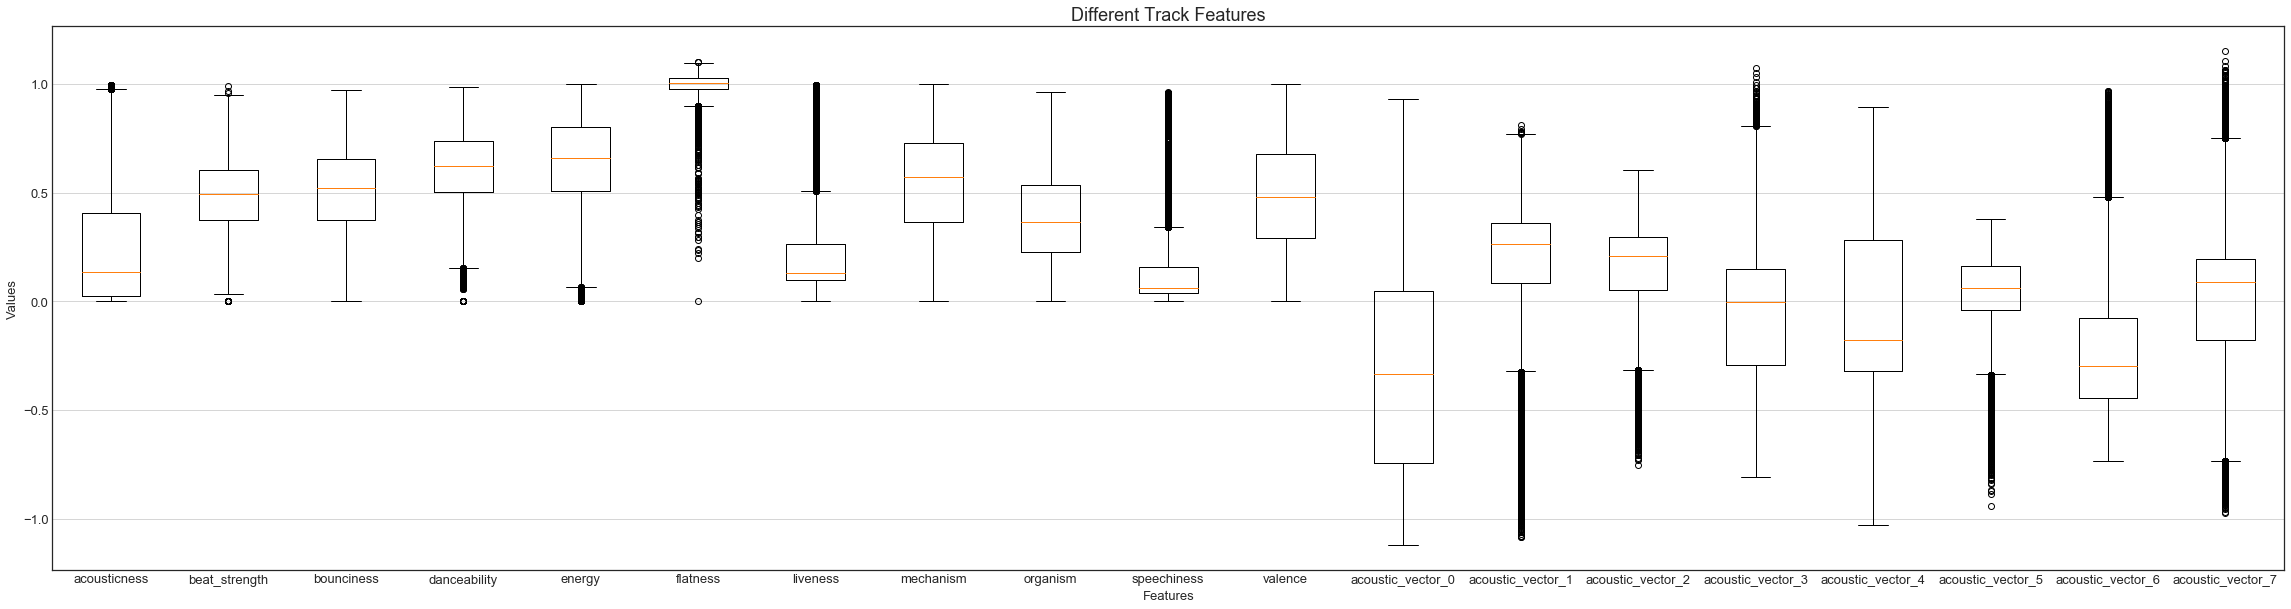

In [15]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(40, 10)) 

features = track_f[['acousticness','beat_strength','bounciness', 'danceability', 'energy',
                    'flatness', 'liveness','mechanism','organism','speechiness', 'valence', 'acoustic_vector_0',
                    'acoustic_vector_1','acoustic_vector_2','acoustic_vector_3','acoustic_vector_4','acoustic_vector_5',
                   'acoustic_vector_6','acoustic_vector_7']]
plt.boxplot(features.values)
ax.set_xticklabels(['acousticness','beat_strength','bounciness', 'danceability', 'energy',
                    'flatness', 'liveness','mechanism','organism','speechiness', 'valence', 'acoustic_vector_0',
                    'acoustic_vector_1','acoustic_vector_2','acoustic_vector_3','acoustic_vector_4','acoustic_vector_5',
                   'acoustic_vector_6','acoustic_vector_7'])

plt.title('Different Track Features',fontsize=18)
plt.xlabel('Features',fontsize=13)
plt.ylabel('Values',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax.yaxis.grid(True)
plt.show()


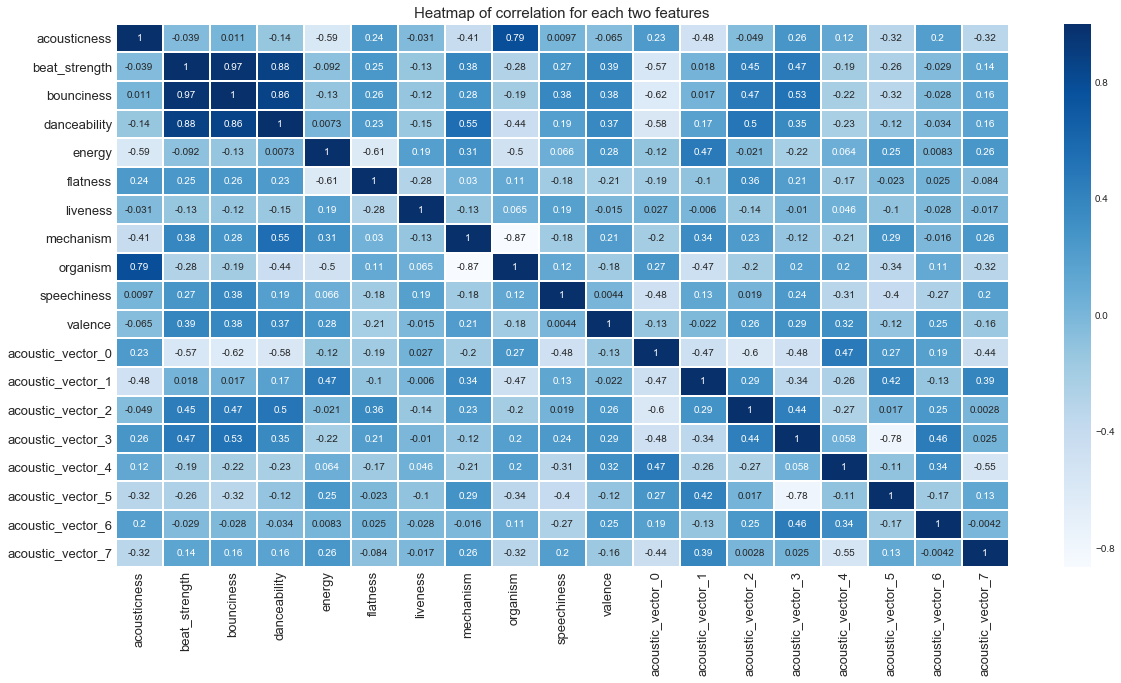

In [16]:
fig, ax = plt.subplots(figsize=(20, 10)) 

sns.heatmap(features.corr(),annot=True,cmap="Blues",linecolor='white',linewidths=1)

plt.title('Heatmap of correlation for each two features',fontsize=15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax.yaxis.grid(True)
plt.show()

In [17]:
log.rename(columns={'track_id_clean':'track_id'}, inplace = True)    
log_track = pd.merge(left=log,right=track_f,how='left',on = 'track_id')      

In [18]:
skip1 = log_track.loc[log_track['skip_1'] == True]
skip2 = log_track.loc[(log_track['skip_1'] == False) & (log_track['skip_2'] == True)]
skip3 = log_track.loc[(log_track['skip_1'] == False) & (log_track['skip_2'] == False) & (log_track['skip_3'] == True)]
Not_skip = log_track.loc[log_track['not_skipped'] == True]


In [ ]:
skip_all = pd.concat([skip1[['us_popularity_estimate']], skip2[['us_popularity_estimate']], skip3[['us_popularity_estimate']], 
                      Not_skip[['us_popularity_estimate']]],axis=1)

skip_all[]

plt.boxplot(skip_all.values)
plt.title('Different Track Features',fontsize=18)
plt.xlabel('Features',fontsize=13)
plt.ylabel('Values',fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax.yaxis.grid(True)
plt.show()

/Users/sue/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
